# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [ ]:
import pandas as pd
import seaborn as sns

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('PATH_TO_DATA')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Напишем вспомогательную функцию-группировщик

In [ ]:
def evaluate_debt_rate_by_grouper(data: pd.DataFrame, grouper_column: str):
    
    return data.groupby(grouper_column).agg(
        debt_rate = ('debt', 'mean'),
        group_size = ('debt', 'count'),
        debt_true = ('debt', 'sum'),
    ).reset_index()

И еще одну для визуализации выводов

In [33]:
def custom_barplot(data, x, y, title):
    sns.catplot(
    data=data,
    x=x,
    y=y,
    kind='bar',
    alpha=0.25,
    orient='h',
).fig.suptitle(title, y=1.1)

Сначала выполним простую группировку по факту наличия детей. Для этого сформируем новый категориальный столбец `child_status` с двумя возможными значениями `child_free` или `has_child`

In [34]:
data['child_status'] = data['children'].apply(lambda ch: 'child_free' if ch == 0 else 'has_child')

In [35]:
debt_grouped_by_children_status = evaluate_debt_rate_by_grouper(data, 'child_status')
debt_grouped_by_children_status

,child_status,debt_rate,group_size,debt_true
0,child_free,0.075438,14091,1063
1,has_child,0.092403,7240,669


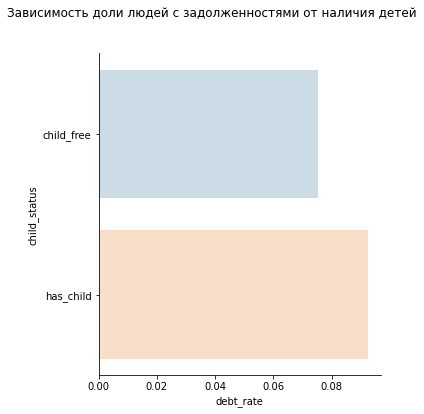

In [36]:
custom_barplot(debt_grouped_by_children_status,
               "debt_rate",
               "child_status",
               'Зависимость доли людей с задолженностями от наличия детей')

Теперь сгруппируем клиентов по признаку "многодетная семья"

In [48]:
data['is_large_family'] = data['children'].apply(lambda ch: 'многодетная семья' if ch >= 3 else 'не более двух детей')

In [49]:
debt_grouped_by_is_large_family = evaluate_debt_rate_by_grouper(data, 'is_large_family')
debt_grouped_by_is_large_family

,is_large_family,debt_rate,group_size,debt_true
0,многодетная семья,0.081579,380,31
1,не более двух детей,0.081189,20951,1701


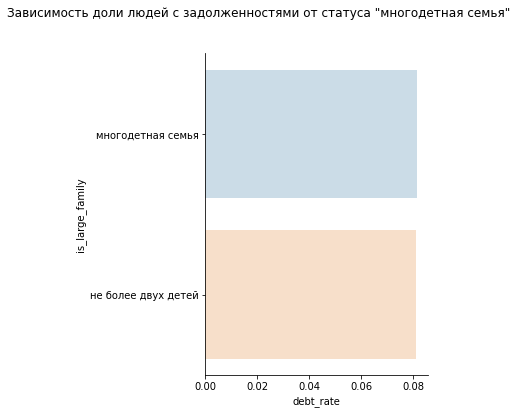

In [50]:
custom_barplot(debt_grouped_by_is_large_family,
               "debt_rate",
               "is_large_family",
               'Зависимость доли людей с задолженностями от статуса "многодетная семья"')

Cгруппируем данные по количеству детей и посчитаем процент людей с задолженностями по каждой группе. 

Так как данные в столбце `debt` по сути являются логическими (но представлены в виде 0 или 1), то процент людей с задолженностями можно рассчитать как среднее по каждой группе. Результат данной операции представлен в столбце `debt_rate`

In [40]:
debt_grouped_by_children = evaluate_debt_rate_by_grouper(data, 'children')
debt_grouped_by_children

,children,debt_rate,group_size,debt_true
0,0,0.075438,14091,1063
1,1,0.092346,4808,444
2,2,0.094542,2052,194
3,3,0.081818,330,27
4,4,0.097561,41,4
5,5,0.000000,9,0


Визуализируем полученный результат в виде столбиковой диаграммы

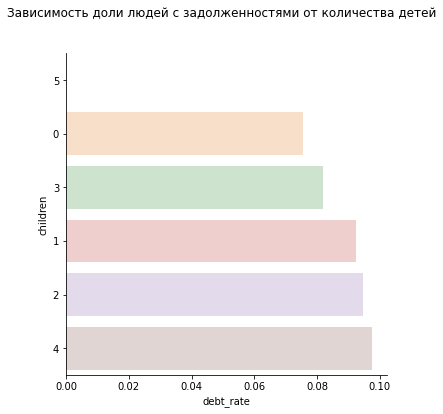

In [41]:
debt_grouped_by_children['children'] = debt_grouped_by_children['children'].astype(str)

custom_barplot(debt_grouped_by_children.sort_values('debt_rate'),
               "debt_rate",
               "children",
               'Зависимость доли людей с задолженностями от количества детей')

<div class="alert alert-block alert-info"><b>Вывод:</b> проанализировав столбцы <code>debt</code> и <code>children</code> на предмет взаимосвязи, можно отметить следующее

1. Наименьший процент людей, имеющих задолженности, представлен в группе клиентов, которые имеют 5 детей. В представленнных данных представители данной группы не имеют задолженностей по кредиту


2. Наибольший процент людей с задолженностями представлен в группе клиентов с количество детей, равным 4. Он составляет $\approx$ 9.75%


3. Дополнительное исследование по факту наличия детей у клиентов банка выявило, что процент людей с задолженностями, имеющих не менее одного ребенка больше чем у бездетных клиентов


4. Сформированный признак "многодетная семья" практически не вляиет на процент людей, имеющих задолженности.</div>

<div class="alert alert-block alert-info">
    Также высока доля клиентов с задолженностями, у которых один или два ребенка
</div>

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [42]:
debt_grouped_by_family_status = evaluate_debt_rate_by_grouper(data, 'family_status')
debt_grouped_by_family_status.sort_values('debt_rate')

,family_status,debt_rate,group_size,debt_true
2,вдовец / вдова,0.066246,951,63
1,в разводе,0.070648,1189,84
4,женат / замужем,0.075606,12261,927
3,гражданский брак,0.093130,4134,385
0,Не женат / не замужем,0.097639,2796,273


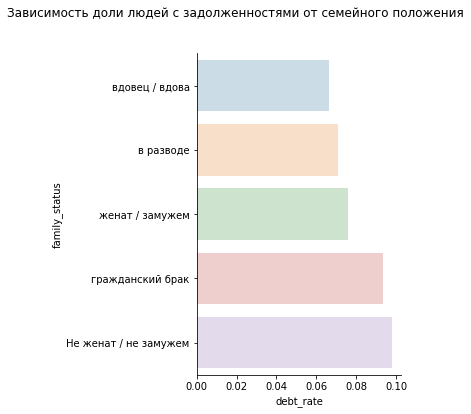

In [43]:
custom_barplot(debt_grouped_by_family_status.sort_values('debt_rate'),
               'debt_rate',
               'family_status',
               'Зависимость доли людей с задолженностями от семейного положения')

 Проведем дополнительный анализ со сводной таблицей, в которой соберем данные о цели кредита, типе дохода и семейном положении 

In [119]:
selected_columns = ['family_status', 'income_type', 'debt', 'purpose_category']
data[selected_columns].pivot_table(columns='family_status',
                                   index=['income_type','purpose_category'], 
                                   values='debt', 
                                   aggfunc=['sum']).fillna(0).astype(int)


sum            \
family_status                            Не женат / не замужем в разводе   
income_type     purpose_category                                           
безработный     операции с недвижимостью                     0         0   
в декрете       операции с автомобилем                       0         0   
госслужащий     операции с автомобилем                       2         0   
                операции с недвижимостью                     8         2   
                получение образования                        2         2   
                проведение свадьбы                           0         0   
компаньон       операции с автомобилем                      18         2   
                операции с недвижимостью                    37         6   
                получение образования                       17         0   
                проведение свадьбы                           0         0   
пенсионер       операции с автомобилем                       9         5   
                операции с недвижимостью                     3         7   
                получение образования                        4         1   
                проведение свадьбы                           0         0   
предприниматель операции с недвижимостью                     0         0   
                проведение свадьбы                           0         0   
сотрудник       операции с автомобилем                      53        14   
                операции с недвижимостью                    81        31   
                получение образования                       39        14   
                проведение свадьбы                           0         0   
студент         операции с недвижимостью                     0         0   

                                                                          \
family_status                            вдовец / вдова гражданский брак   
income_type     purpose_category                                           
безработный     операции с недвижимостью              0                0   
в декрете       операции с автомобилем                0                0   
госслужащий     операции с автомобилем                2                4   
                операции с недвижимостью              0                3   
                получение образования                 0                4   
                проведение свадьбы                    0                7   
компаньон       операции с автомобилем                3                7   
                операции с недвижимостью              5               19   
                получение образования                 1               17   
                проведение свадьбы                    0               51   
пенсионер       операции с автомобилем                9                1   
                операции с недвижимостью             17                6   
                получение образования                11                4   
                проведение свадьбы                    0               25   
предприниматель операции с недвижимостью              0                0   
                проведение свадьбы                    0                0   
сотрудник       операции с автомобилем                6               39   
                операции с недвижимостью              6               63   
                получение образования                 3               35   
                проведение свадьбы                    0              100   
студент         операции с недвижимостью              0                0   

                                                          
family_status                            женат / замужем  
income_type     purpose_category                          
безработный     операции с недвижимостью               1  
в декрете       операции с автомобилем                 1  
госслужащий     операции с автомобилем                14  
                операции с недвижимостью              2

<div class="alert alert-block alert-info"> <b>Вывод:</b> проанализировав столбцы <code>debt</code> и <code>family_status</code> на предмет взаимосвязи, можно отметить следующее

1. Наименьший процент людей, имеющих задолженности, представлен в группе клиентов "вдовец/вдова" ($\approx$ 6.62%). 


2. Наибольший процент людей с задолженностями представлен в группе клиентов с семейным положением "не женат/не замужем". Он составляет $\approx$ 9.76%.


3. Официально зарегистрированные супруги-клиенты банка имеют меньший процент людей с задолженностями чем клиенты, состоящие в гражданском браке. </div>

<div class="alert alert-block alert-info">
    
1. Отметим, что в категории "вдовец/вдова" наиболее представлены пенсионеры, имеющие задолженность по кредиту, который брался для проведения операций с недвижимостью, получения образования, а также операций с автомобилем.

    
2. В категории  "не женат/не замужем" наиболее распространены задолженности по кредиту с целью проведения операций с недвижимостью 
    

3. А в категории "гражданский брак" наиболее распространены задолженности по кредиту с целью, как бы иронично не звучало, организации свадьбы. 
</div>

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [44]:
debt_grouped_by_income_category = evaluate_debt_rate_by_grouper(data, 'total_income_category')
debt_grouped_by_income_category.sort_values('debt_rate')

,total_income_category,debt_rate,group_size,debt_true
3,D,0.060172,349,21
1,B,0.070602,5014,354
0,A,0.080000,25,2
2,C,0.084982,15921,1353
4,E,0.090909,22,2


Отметим, что группы клиентов с категориями доходов A и E являются самыми малочисленными. Возможно, это произошло из-за заполнения пропусков медианным значение доходов.

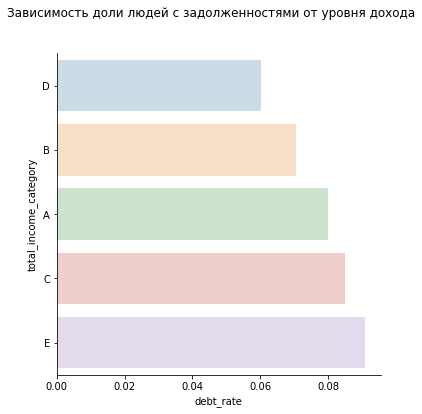

In [45]:
custom_barplot(debt_grouped_by_income_category.sort_values('debt_rate'),
               'debt_rate',
               'total_income_category',
               'Зависимость доли людей с задолженностями от уровня дохода')

Визуализируем размеры групп

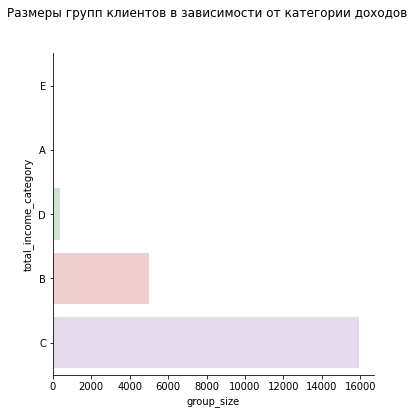

In [64]:
custom_barplot(debt_grouped_by_income_category.sort_values('group_size'),
               'group_size',
               'total_income_category',
               'Размеры групп клиентов в зависимости от категории доходов')

 Отчетливо видно, что построение выводов по группам E и A будет не совсем корректным, так как количество клиентов в них слишком мало. Причиной этому может служить заполнение пропущенных данных медианным значением в начале проекта. Клиент с пропуском в поле <code>total_income</code> после заполнения медианным значением в зависимости от категориив поле <code>income_type</code> мог сменить категорию дохода. 

<div class="alert alert-block alert-info"><b>Вывод: </b> проанализировав столбцы <code>debt</code> и <code>total_income_category</code> на предмет взаимосвязи, можно отметить следующее

1. Наименьший процент людей, имеющих задолженности, представлен в группе клиентов, чей доход имеет категорию D ($\approx$ 6%). 


2. Наибольший процент людей с задолженностями представлен в группе клиентов, чей доход имеет категорию С. Он составляет $\approx$ 8.5%.

    
3. Относительно представителей категорий доходов A и E нельзя сделать выводы, так как эти группы клиентов образуют нерепрезентативные выборки. Их размеры на три порядка ниже чем суммарное количество строк в датасете. </div> </b> 

</div>

In [115]:
selected_columns = ['total_income_category', 'debt', 'purpose_category']
data[selected_columns].pivot_table(columns='total_income_category',
                                   index=['purpose_category'], 
                                   values='debt', 
                                   aggfunc=['sum', 'mean']).fillna(0).round(2)

sum                   mean                        
total_income_category      A    B    C   D  E     A     B     C     D     E
purpose_category                                                           
операции с автомобилем     0   85  305  10  0  0.00  0.08  0.10  0.14  0.00
операции с недвижимостью   1  172  599   6  2  0.06  0.07  0.07  0.04  0.18
получение образования      1   69  297   2  0  0.25  0.08  0.10  0.03  0.00
проведение свадьбы         0   28  152   3  0  0.00  0.05  0.09  0.09  0.00

Дополнительный анализ по сводной таблице приводит к выводу, что клиенты с категорией дохода C, больше всего имеют задолженность с целями кредита "операции с автомобилем" и "получение образования"

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [46]:
debt_grouped_by_purpose_category = evaluate_debt_rate_by_grouper(data, 'purpose_category')
debt_grouped_by_purpose_category.sort_values('debt_rate')

,purpose_category,debt_rate,group_size,debt_true
1,операции с недвижимостью,0.072551,10751,780
3,проведение свадьбы,0.079118,2313,183
2,получение образования,0.092528,3988,369
0,операции с автомобилем,0.093480,4279,400


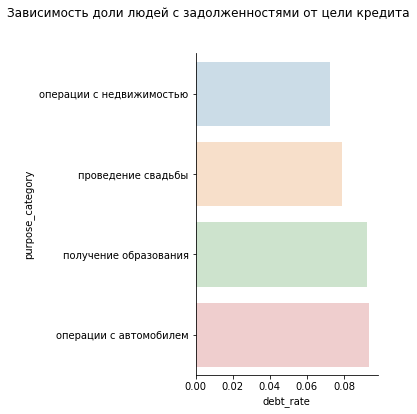

In [47]:
custom_barplot(debt_grouped_by_purpose_category.sort_values('debt_rate'),
               'debt_rate',
               'purpose_category',
               'Зависимость доли людей с задолженностями от цели кредита')

<div class="alert alert-block alert-info"><b>Вывод:</b> проанализировав столбцы <code>debt</code> и <code>purpose_category</code> на предмет взаимосвязи, можно отметить следующее

1. Наименьший процент людей, имеющих задолженности, представлен в группе "операции с недвижимостью"($\approx$ 7.25%). 


2. Наибольший процент людей с задолженностями представлен в группе "операции с автомобилем". Он составляет $\approx$ 9.34%.


3. Также высок процент людей с задолженностями в группе "получение образования" ($\approx$ 9.25%). </div>

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* 

Изначально пропуски в данном датасете присутствовали в столбцах `total_income` и `days_employed`. Судя по наличию отрицательных значений, возможно, что пользователь мог не только перепутать "окна", куда нужно вставлять данные о начале и конце работы, но и написать там некорректные данные (буквы, строчки и тд.). Пользователь так же мог некорректно вписать в одно из окошек по доходам буквенные выражения. Например, вместо нуля могла быть вписана латинская буква "О". Возможно также, что данная информация конфиденциальная и просто скрыта для ряда клиентов.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* 

Всегда есть соблазн воспользоваться самой простой центральной тенденцией - средним арифметическим. Однако если в данных будут слишком большие значения, то среднее арифметическое будет "тяготеть" к этим большим значениям. Медиана же является робастной метрикой и более объективно оценивает среднее или типичное значение, отлично подходящее для заполнения пропусков в данных.

### Шаг 4: общий вывод.

<div class="alert alert-block alert-info">
1. На долю людей, имеющих задолженности, влияет несколько факторов 

 - количество детей и факт их наличия
 - семейное положение
 - уровень доходов
 - цель кредита


2. Оказалось, что самые большие семьи (имеющие 5 детей), представленные в выборке, имеют безупречную кредитную историю. Однако клиенты с 4 детьми образуют самую большую группу по числу лиц, имеющих задолженности. Если посмотреть на данные в разрезе созданного признак "имеются ли дети", то можно отметить, что в представленных данных доля клиентов, имеющих задолженности по кредиту и не имеющих детей, меньше, чем доля тех, кто имеет не менее одного ребенка. При этом фактор многодетной семьи практически не влияет на долю клиентов с задолженностями.
Cамая многочисленная группа, представленная в данных имеет 1-2 детей. В этих категориях достаточно высока доля клиентов, имеющих задолженности по кредиту 


3. На долю людей с задолженностями также влияет и семейное положение. В ходе анализа было выявлено, что группа "вдовец/вдова" составляет самую малочисленную долю людей с задолженностями. С другой стороны в группе "не женат/не замужем" самая большая доля людей с задолженностями. 



4. Было также исследовано влияние уровня дохода на долю людей с задолженностями. Оказалось, что клиенты с доходами категории D образуют группу с самой малой долей людей с задолженностями, а самую большую долю образуют клиенты с категорией доходов C



5. Клиенты с целью кредита "операции с недвижимостью" образуют группу с самой малой долей людей с задолженностями, а клиенты группы "операции с автомобилем" имеют самую большую долю людей с задолженностями 
</div>